# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.052748e+01     8.209259e+00
 * time: 0.0018520355224609375
     1     2.933128e+01     5.092173e+00
 * time: 0.007576942443847656
     2     2.105204e+01     5.228413e+00
 * time: 0.014615058898925781
     3     1.454979e+01     4.797616e+00
 * time: 0.021335124969482422
     4     1.152868e+01     1.781061e+00
 * time: 0.02721405029296875
     5     1.064236e+01     2.859475e+00
 * time: 0.03253006935119629
     6     9.932314e+00     1.372198e+00
 * time: 0.03800201416015625
     7     9.264653e+00     1.515824e+00
 * time: 0.043702125549316406
     8     8.723473e+00     1.565571e+00
 * time: 0.049340009689331055
     9     8.387805e+00     1.026279e+00
 * time: 0.08609604835510254
    10     8.228265e+00     8.661558e-01
 * time: 0.08983397483825684
    11     8.116250e+00     7.919626e-01
 * time: 0.09343504905700684
    12     8.039026e+00     7.732954e-01
 * time: 0.09645915031433105
    13     7.962718e+00     6.164113e-01
 

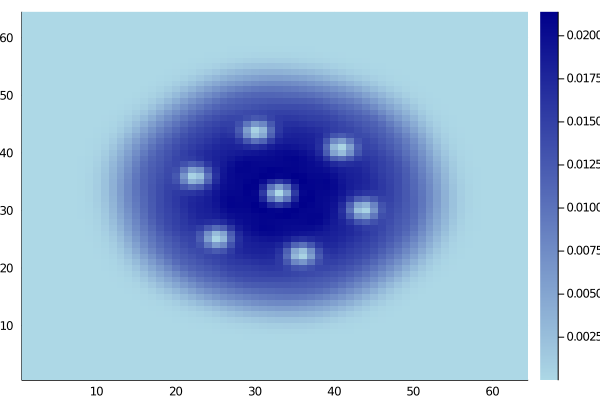

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)